## Mass completeness limit

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from astropy.table import Table
from scipy import optimize, interpolate
import tqdm

In [2]:
bgs = Table.read('../data/BGS_ANY_full.provabgs.hdf5')

In [3]:
bgs_bright = bgs[bgs['is_bgs_bright']]
bgs_faint = bgs[bgs['is_bgs_faint']]
# bgs[:5]

In [4]:
mask_bright = (bgs_bright['Z_HP'] > 0.) & (bgs_bright['MAG_R'] > 0.) & (bgs_bright['provabgs_logMstar_bf'] > 0.)
mask_faint = (bgs_faint['Z_HP'] > 0.) & (bgs_faint['MAG_R'] > 0.) & (bgs_faint['provabgs_logMstar_bf'] > 0.)

In [5]:
z_bright = bgs_bright['Z_HP'][mask_bright]
x_bright = bgs_bright['provabgs_logMstar_bf'][mask_bright]
mag_r_bright = bgs_bright['MAG_R'][mask_bright]

z_faint = bgs_faint['Z_HP'][mask_faint]
x_faint = bgs_faint['provabgs_logMstar_bf'][mask_faint]
mag_r_faint = bgs_faint['MAG_R'][mask_faint]

In [6]:
logmstar_limit_bright = x_bright + 0.4*(mag_r_bright - 19.5)
logmstar_limit_faint = x_faint + 0.4*(mag_r_faint - 20.175)

# Selecting the faintest 20% 
faintest_20p_bright = np.percentile(mag_r_bright,20)
faintest_20p_faint = np.percentile(mag_r_faint,20)
faintest_20p_mask_bright = mag_r_bright<faintest_20p_bright
faintest_20p_mask_faint = mag_r_faint<faintest_20p_faint

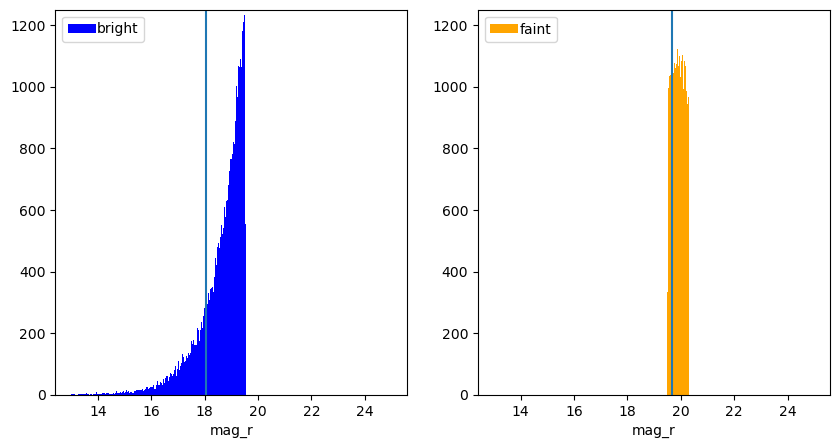

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(mag_r_bright, range=(13,25), bins=1400, label='bright', color='blue')
plt.plot(np.repeat(faintest_20p_bright, 10), np.linspace(0, 10000, 10))
plt.xlabel(r'mag_r')
plt.ylim(0,1250)
plt.legend(loc='upper left', fontsize=10, markerscale=50, handletextpad=0.1)

plt.subplot(1,2,2)
plt.hist(mag_r_faint, range=(13,25), bins=1400, label='faint', color='orange')
plt.plot(np.repeat(faintest_20p_faint, 10), np.linspace(0, 12000, 10))
plt.xlabel(r'mag_r')
plt.ylim(0,1250)
plt.legend(loc='upper left', fontsize=10, markerscale=50, handletextpad=0.1)

In [68]:
z_bins_bright = np.arange(0,0.3, 0.0025)
z_limit_bright = np.zeros((len(z_bins_bright)-1))

z_bins_faint = np.arange(0,0.3, 0.0119)
# 0.008
z_limit_faint = np.zeros((len(z_bins_faint)-1))

mass_limit_bright = np.zeros((len(z_bins_bright)-1))
mass_limit_faint = np.zeros((len(z_bins_faint)-1))

for i in range(len(z_bins_bright)-1):
    mask_bright = (z_bright>z_bins_bright[i]) & (z_bright<=z_bins_bright[i+1]) & faintest_20p_mask_bright
    z_limit_bright[i] = np.nanpercentile(z_bright[mask_bright], 90)
    mass_limit_bright[i] = np.nanpercentile(logmstar_limit_bright[mask_bright], 90)

for i in range(len(z_bins_faint)-1):
    mask_faint = (z_faint>z_bins_faint[i]) & (z_faint<=z_bins_faint[i+1]) & faintest_20p_mask_faint
    z_limit_faint[i] = np.nanpercentile(z_faint[mask_faint], 90)
    mass_limit_faint[i] = np.nanpercentile(logmstar_limit_faint[mask_faint], 90)

In [69]:
mass_limit_bright_function = interpolate.interp1d(z_limit_bright,mass_limit_bright, fill_value='extrapolate')
mass_limit_faint_function = interpolate.interp1d(z_limit_faint,mass_limit_faint, fill_value='extrapolate')

In [70]:
line = np.linspace(0.0,0.3, 100)

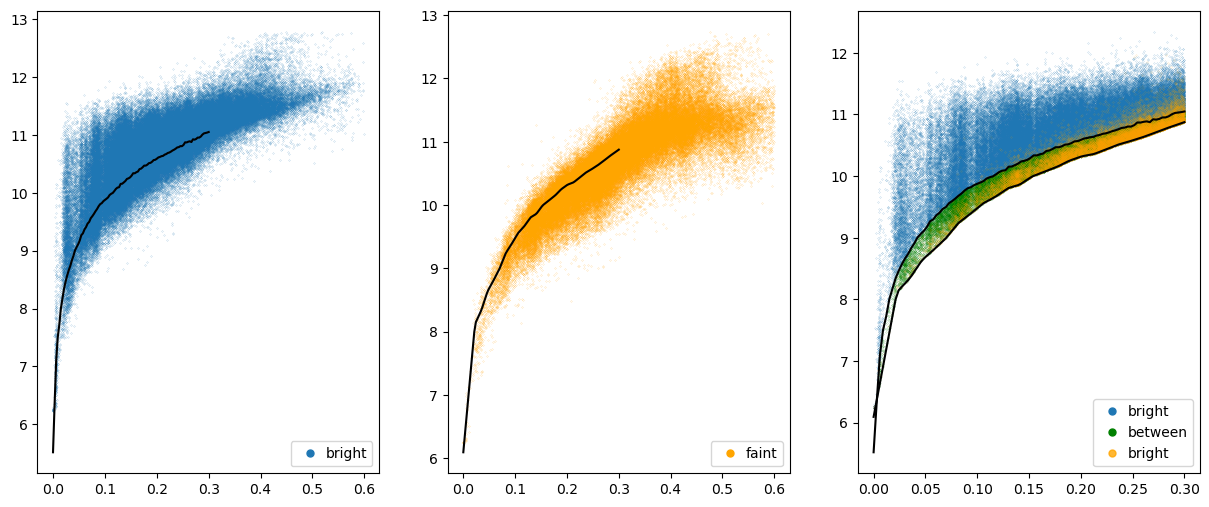

In [71]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(z_bright, x_bright, 'o', markersize=0.1, label='bright')
plt.legend(loc='lower right', fontsize=10, markerscale=50, handletextpad=0.1)
plt.plot(line, mass_limit_bright_function(line), color='k')

plt.subplot(1,3,2)
plt.plot(z_faint, x_faint, 'o', markersize=0.1, label='faint', color='orange')
plt.legend(loc='lower right', fontsize=10, markerscale=50, handletextpad=0.1)
plt.plot(line, mass_limit_faint_function(line), color='k')

plt.subplot(1,3,3)
mask_above_bright = (z_bright < 0.3) & (x_bright > mass_limit_bright_function(z_bright))
mask_between_bright = (z_bright < 0.3) & (x_bright < mass_limit_bright_function(z_bright)) & (x_bright > mass_limit_faint_function(z_bright))
mask_above_faint = (z_faint < 0.3) & (x_faint > mass_limit_faint_function(z_faint))

plt.plot(z_bright[mask_above_bright], x_bright[mask_above_bright], 'o', markersize=0.1, label='bright')
plt.plot(z_bright[mask_between_bright], x_bright[mask_between_bright], 'o', markersize=0.1, label='between', color='green', alpha=1)
plt.plot(z_faint[mask_above_faint], x_faint[mask_above_faint], 'o', markersize=0.1, label='bright', color='orange', alpha=0.8)


plt.legend(loc='lower right', fontsize=10, markerscale=50, handletextpad=0.1)
plt.plot(line, mass_limit_faint_function(line), color='k')
plt.plot(line, mass_limit_bright_function(line), color='k')

## Bright + Faint

In [ ]:
x = np.concatenate((x_faint, x_bright))
z = np.concatenate((z_faint, z_bright))
mag_r = np.concatenate((mag_r_faint, mag_r_bright))

In [ ]:
logmstar_limit_bright = x + 0.4*(mag_r - 20.175)

In [ ]:
faintest_20p = np.percentile(mag_r,20)
faintest_20p_mask = mag_r<faintest_20p

In [ ]:
plt.hist(mag_r, range=(13,25), bins=1400)
plt.plot(np.repeat(faintest_20p, 10), np.linspace(0, 900, 10))

In [ ]:
z_bins = np.arange(0,0.3, 0.0025)
z_limit = np.zeros((len(z_bins)-1))
mass_limit_bright = np.zeros((len(z_bins)-1))

In [ ]:
for i in range(len(z_bins)-1):
    mask = (z>z_bins[i]) & (z<=z_bins[i+1]) & faintest_20p_mask
    z_limit[i] = np.nanpercentile(z[mask], 90)
    mass_limit_bright[i] = np.nanpercentile(logmstar_limit_bright[mask], 90)

In [ ]:
mass_limit_bright_function = interpolate.interp1d(z_limit,mass_limit_bright, fill_value='extrapolate')

In [ ]:
line = np.linspace(0.0,0.3, 100)

In [ ]:
plt.figure(figsize=(7,7))
# plt.plot(z, x, 'o', markersize=0.1)
plt.plot(z_bright, x_bright, 'o', markersize=0.1, label='bright')
plt.plot(z_faint, x_faint, 'o', markersize=0.1, label='faint')
plt.plot(line, mass_limit_bright_function(line), color='k')
# plt.plot(z_bins[:-1], mass_limit_bright, 'o')
# plt.plot(np.repeat(0.01, 10), np.linspace(6,13, 10))

In [ ]:
np.save('z_limit_bgs_faint.npy' ,z_limit)

In [ ]:
np.save('mass_limit_faint.npy',mass_limit_bright)

In [ ]:
alpha2 = -1.48

In [ ]:
np.repeat(alpha2 , 10)[:,None] + 1

In [ ]:
bin_mask = (z > 0.4) & (z < 0.405) & faintest_20p_mask

In [ ]:
plt.hist(logmstar_limit_bright[bin_mask], range=(13,20), bins=1400)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(z, mag_r, 'o', markersize=0.1)
plt.plot(line, np.repeat(faintest_20p, len(line)))

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(x, mag_r, 'o', markersize=0.1)

In [ ]:
mag_r.max()